## Example of how to use BMTOOL gap junction tuner.
### We first need to set up the tuner. We have general settings and connection specific parameters. We also need to say where our mechanisms and cell templates are located

#### First we will compile the modfiles

In [1]:
import os

# if already compiled then lets delete the folder and force a recompile
if os.path.isdir('modfiles/x86_64'):
    os.system("rm -rf modfiles/x86_64 ")
# compile the mod files
if not os.path.isdir("modfiles/x86_64"):
    os.chdir('modfiles')
    os.system("nrnivmodl")
    os.chdir("..")

/home/gjgpb9/miniconda3/envs/bmtk/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles
Mod files: "./AMPA_NMDA_STP.mod" "./cadad.mod" "./cal2.mod" "./can_mig.mod" "./exp2syn_stp.mod" "./GABA_A_STP.mod" "./gap.mod" "./Gfluct.mod" "./h_kole.mod" "./imCA3.mod" "./kap_BS.mod" "./kBK.mod" "./kdmc_BS.mod" "./kdr_BS.mod" "./kdrCA3.mod" "./kdrinter.mod" "./leak.mod" "./nainter.mod" "./napCA3.mod" "./natCA3.mod" "./nax_BS.mod" "./vecevent_coreneuron.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../AMPA_NMDA_STP.mod
 -> NMODL ../cadad.mod
 -> NMODL ../cal2.mod
 -> NMODL ../can_mig.mod
 -> NMODL ../exp2syn_stp.mod
 -> NMODL ../GABA_A_STP.mod
 -> NMODL ../gap.mod
 -> NMODL ../Gfluct.mod
 -> NMODL ../h_kole.mod


Translating AMPA_NMDA_STP.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/AMPA_NMDA_STP.c
Translating cadad.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/cadad.c
Translating cal2.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/cal2.c
Thread Safe
Thread Safe
Thread Safe
Translating can_mig.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/can_mig.c
Thread Safe
Translating exp2syn_stp.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/exp2syn_stp.c
Thread Safe
Translating GABA_A_STP.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/GABA_A_STP.c
Translating gap.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/gap.c
Thread Safe
Translating Gfluct.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/Gfluct.c
Thread Safe
Notice: This mechanism cannot be used 

 -> NMODL ../imCA3.mod
 -> NMODL ../kap_BS.mod
 -> NMODL ../kBK.mod
 -> NMODL ../kdmc_BS.mod
 -> NMODL ../kdr_BS.mod
 -> NMODL ../kdrCA3.mod
 -> NMODL ../kdrinter.mod
 -> NMODL ../leak.mod
 -> NMODL ../nainter.mod
 -> NMODL ../napCA3.mod
 -> NMODL ../natCA3.mod
 -> NMODL ../nax_BS.mod
 -> NMODL ../vecevent_coreneuron.mod
 -> Compiling AMPA_NMDA_STP.c
 -> Compiling cadad.c
Notice: ARTIFICIAL_CELL is a synonym for POINT_PROCESS which hints that it
only affects and is affected by discrete events. As such it is not
located in a section and is not associated with an integrator
 -> Compiling cal2.c
 -> Compiling can_mig.c
 -> Compiling exp2syn_stp.c
 -> Compiling GABA_A_STP.c
 -> Compiling gap.c
 -> Compiling Gfluct.c
 -> Compiling h_kole.c
 -> Compiling imCA3.c
 -> Compiling kap_BS.c
 -> Compiling kBK.c
 -> Compiling kdmc_BS.c
 -> Compiling kdr_BS.c
 -> Compiling kdrCA3.c
 -> Compiling kdrinter.c
 -> Compiling leak.c
 -> Compiling nainter.c
 -> Compiling napCA3.c
 -> Compiling natCA3.c
 -> 

In [2]:
from bmtool.synapses import GapJunctionTuner
%matplotlib inline

mechanisms_dir = 'modfiles'
templates_file = 'templates.hoc'

general_settings = {
    'tstart': 500., # when the current clamp starts
    'tdur': 500.,    # Dur of the current clamp
    'dt': 0.025, # simulation dt
    'celsius': 20 # temp of sim
}

conn_type_settings = {
    'FSI_gap': {
        'cell': 'FSI_Cell', #template name 
        'iclamp_amp' : -0.01, # nA what amp to stim cell at
        'sec_x': 0.5, # location of syn
        'sec_id': 0,  # location of syn
        "level_of_detail": "gap", # which synaptic mech to use
    }
}

tuner = GapJunctionTuner(mechanisms_dir=mechanisms_dir,templates_dir=templates_file,
                         general_settings=general_settings,conn_type_settings=conn_type_settings['FSI_gap'])


--No graphics will be displayed.


### We can then manually tune using the run.model method

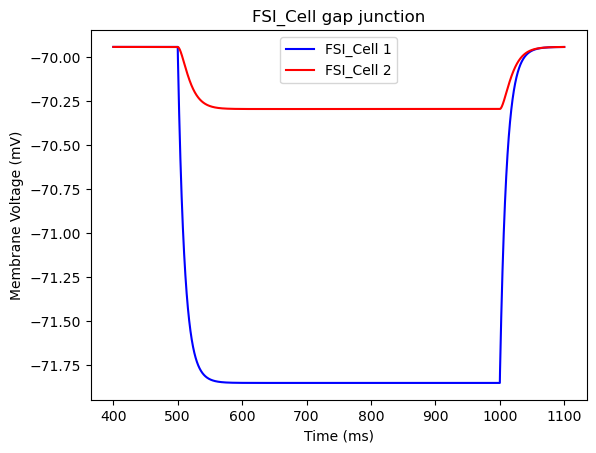

coupling_coefficient is 0.1848


In [3]:
tuner.InteractiveTuner()

### While we can manually tune the coupling coefficient since there is only one parameter that we are tuning we can optimize and find the best resistance!

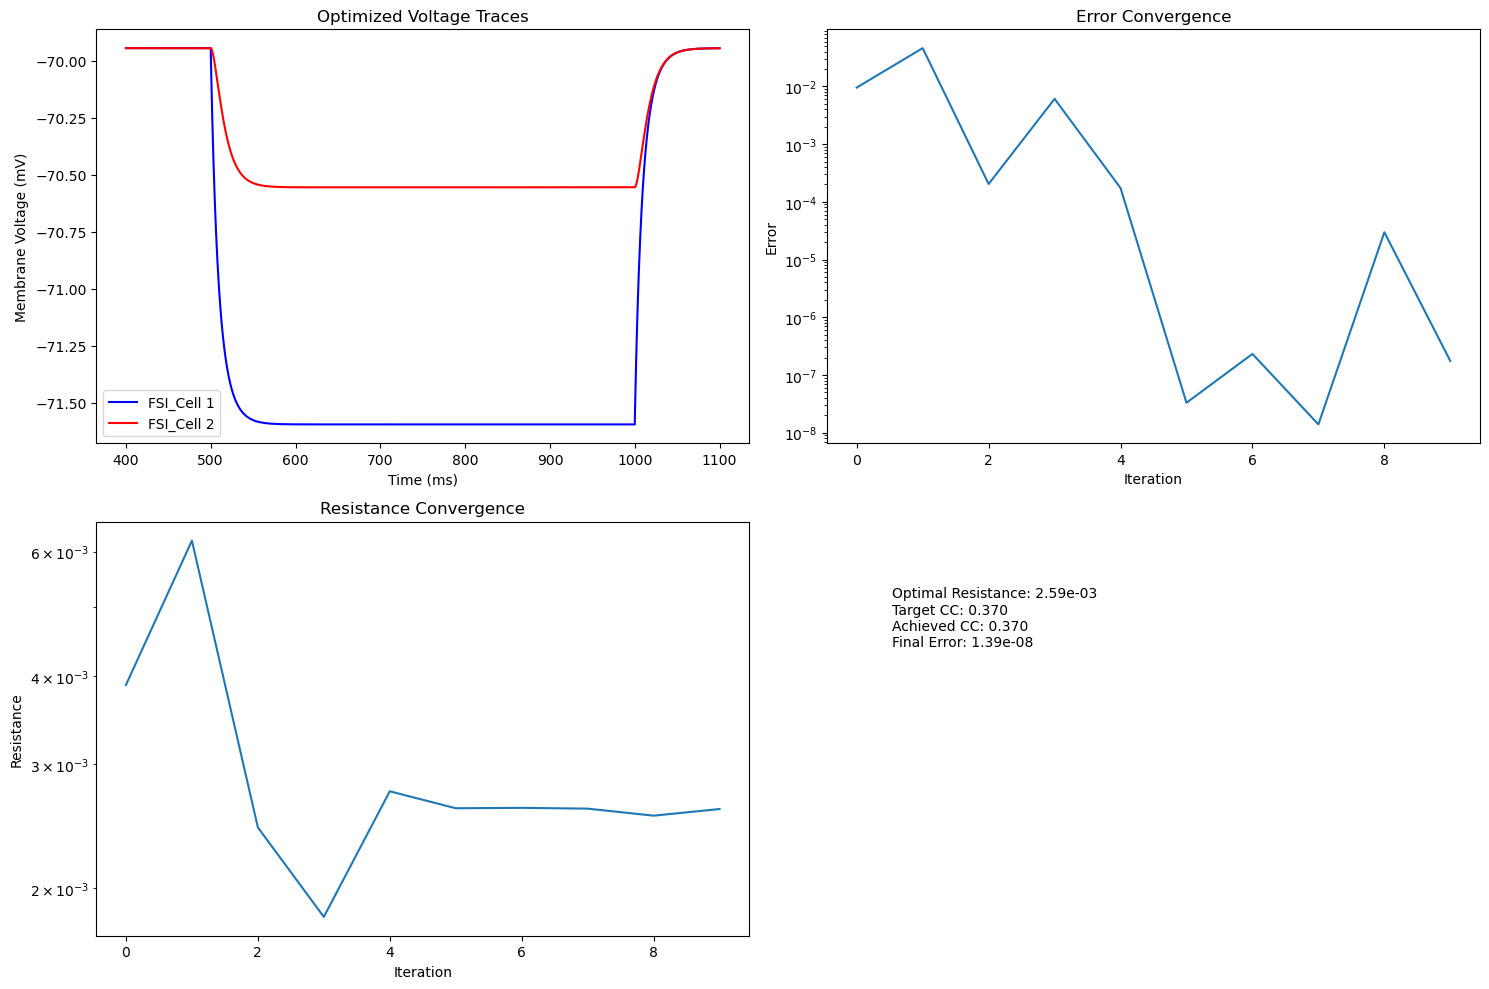

In [4]:
from bmtool.synapses import GapJunctionOptimizer

# Create optimizer
optimizer = GapJunctionOptimizer(tuner)

# Optimize for a target coupling coefficient
target_cc = 0.37  # Example target coupling coefficient
result = optimizer.optimize_resistance(
    target_cc=target_cc,
    resistance_bounds=(1e-4, 1e-2)  # Min and max resistance values to try
)

# Plot optimization results
optimizer.plot_optimization_results(result)

### We can also perform a parameter sweep to see the relationship between resistance and coupling coefficient

Sweeping resistance values:   0%|          | 0/20 [00:00<?, ?it/s]

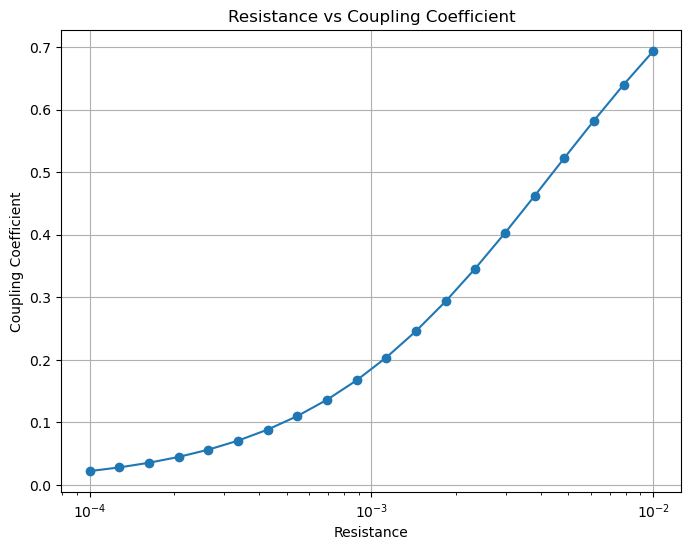

In [5]:
import matplotlib.pyplot as plt
import numpy as np

resistance_range = np.logspace(-4, -2, 20)  # 20 points between 1e-4 and 1e-2
sweep_results = optimizer.parameter_sweep(resistance_range)

# Plot sweep results
plt.figure(figsize=(8, 6))
plt.semilogx(sweep_results['resistance'], sweep_results['coupling_coefficient'], 'o-')
plt.xlabel('Resistance')
plt.ylabel('Coupling Coefficient')
plt.title('Resistance vs Coupling Coefficient')
plt.grid(True)
plt.show()